## MBAN 6110 T Assignment 1

## download the data

In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/Users/xinyuanliang/Desktop/MBAN 6110/sales_data.csv")


## data cleaning

##### Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

There are five columns in total, namely, product, region, price, units sold and sale date. There are 1050 recodes, which only sale date column without nan values. The following are the ways and reasons dealing with nan values for each column.


*   Product & Region: since there are product and region columns in nan values recording the sales details, which means it is possible that some products and regions may not included in the scope. Thus we fill these two columns in 'other'.
*   Sale date: converting the data types into datetime in order to extract the time information further for the analysis.
*   Units Sold: deleting the rows in nan values, since it is useless if there is no specific sale units in the sale record.
*   Price: use the mean price grouped by product and region to fill the nan because the mean of the price could roughly get the final result of total sales (price * units sold)in one products of the specific region, which benefits the result.





In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [6]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


In [7]:
df.head()
 # convert to the datatime
df['Sale Date'] = pd.to_datetime(df['Sale Date']) 

# fill Nan with 'Other'
df['Product'] = df['Product'].fillna("Other")  

# fill Nan with 'Other'
df['Region'] = df['Region'].fillna("Other") 

# delete the Nan rows in spesfic column
df.dropna(subset='Units Sold',inplace=True)  

# use the mean price grouped by product and region to fill the nan
df['Price']=  df['Price'].fillna(df.groupby(['Product','Region'])['Price'].transform('mean'))

# delete the Nan rows in spesfic column
df.dropna(subset='Price',inplace=True) 

df.dtypes

Product               object
Region                object
Price                float64
Units Sold           float64
Sale Date     datetime64[ns]
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     916 non-null    object        
 1   Region      916 non-null    object        
 2   Price       916 non-null    float64       
 3   Units Sold  916 non-null    float64       
 4   Sale Date   916 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 42.9+ KB


In [9]:
# add one column
df['Total Sale'] = df['Price'] * df['Units Sold']

## analysis

### sales performance of products and regions

Region
Other        979.0
Region_5     969.0
Region_2     958.0
Region_7     907.0
Region_9     873.0
Region_8     861.0
Region_1     796.0
Region_4     774.0
Region_10    765.0
Region_3     747.0
Name: Units Sold, dtype: float64


<Axes: title={'center': 'sale units in top10 region'}, xlabel='Region'>

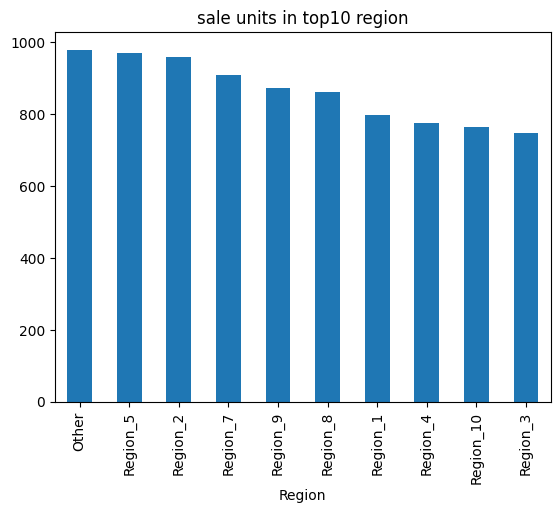

In [10]:
region_count = df.groupby(['Region'])['Units Sold'].sum().sort_values(ascending=False).head(10) 
print(region_count)
region_count.plot(kind='bar', title='sale units in top10 region')

Region
Region_5     146888.528571
Region_2     128957.808500
Region_8     106918.620833
Other         97601.994000
Region_7      89667.870000
Region_10     83570.121667
Region_6      78246.110000
Region_9      77285.156667
Region_1      76893.809444
Region_4      72727.045000
Name: Total Sale, dtype: float64


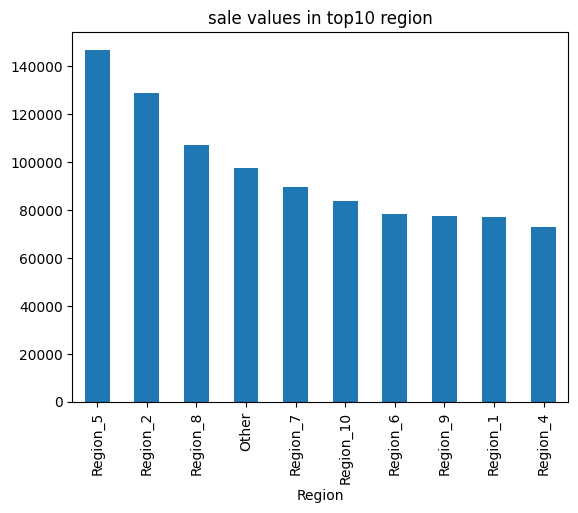

In [11]:
region_total_count = df.groupby(['Region'])['Total Sale'].sum().sort_values(ascending=False).head(10) 
print(region_total_count)
region_count = region_total_count.plot(kind='bar', title='sale values in top10 region')

Product
Other         928.0
Product_24    296.0
Product_40    268.0
Product_43    244.0
Product_4     237.0
Product_49    237.0
Product_8     229.0
Product_19    225.0
Product_42    220.0
Product_10    216.0
Name: Units Sold, dtype: float64


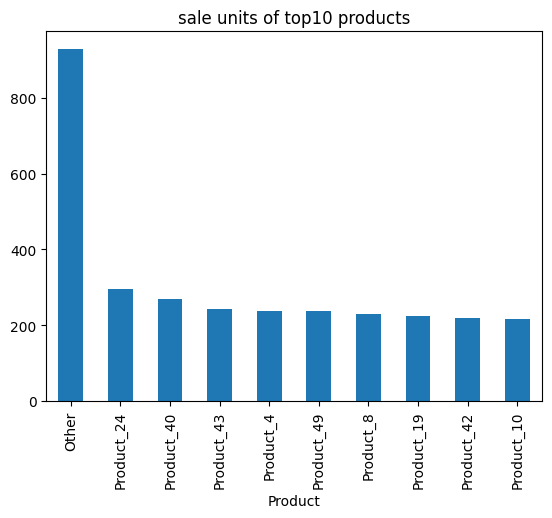

In [12]:
product_count = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).head(10) 
print(product_count)
product_count =product_count.plot(kind='bar', title='sale units of top10 products')

Product
Other         149851.157016
Product_34     51104.950000
Product_49     42024.698000
Product_50     33955.060000
Product_27     32659.550000
Product_40     30860.010000
Product_23     29059.850000
Product_19     27009.725000
Product_7      24010.770000
Product_22     23464.020000
Name: Total Sale, dtype: float64


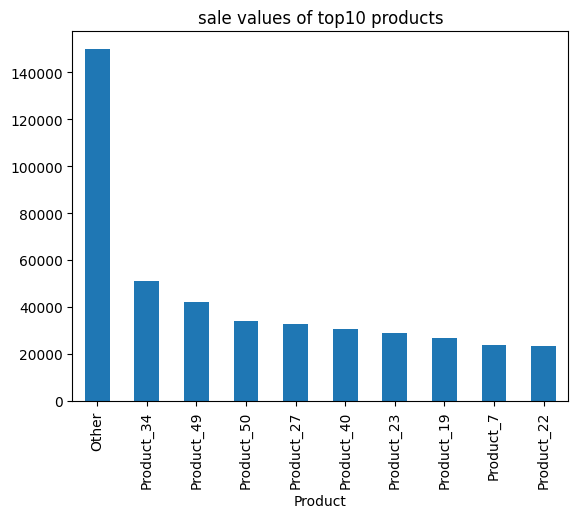

In [13]:
product_total_count = df.groupby('Product')['Total Sale'].sum().sort_values(ascending=False).head(10) 
print(product_total_count)
product_total_count = product_total_count.plot(kind='bar', title='sale values of top10 products')

In [14]:
product_region_count = df.groupby(['Region','Product'])['Units Sold'].sum().sort_values(ascending=False).head(10)
print("Title: product_region_count")
print(product_region_count)

product_region_sale_ratio=df.groupby(['Region','Product'])['Units Sold'].sum()/df['Units Sold'].sum()
print("Title: product_region_ratio")
product_region_sale_ratio.sort_values(ascending=False).head(10)

Title: product_region_count
Region    Product   
Region_2  Other         119.0
Other     Other         110.0
Region_5  Other         110.0
Region_8  Other         106.0
Region_4  Other         106.0
Region_1  Other          90.0
Region_9  Other          82.0
Other     Product_28     76.0
Region_2  Product_49     74.0
Region_6  Other          66.0
Name: Units Sold, dtype: float64
Title: product_region_ratio


Region    Product   
Region_2  Other         0.012755
Other     Other         0.011790
Region_5  Other         0.011790
Region_8  Other         0.011361
Region_4  Other         0.011361
Region_1  Other         0.009646
Region_9  Other         0.008789
Other     Product_28    0.008146
Region_2  Product_49    0.007931
Region_6  Other         0.007074
Name: Units Sold, dtype: float64

In [15]:
product_region_count = df.groupby(['Region','Product'])['Total Sale'].sum().sort_values(ascending=False).head(10)
print("Title: product_region_total_values")
print(product_region_count)

product_region_sale_ratio=df.groupby(['Region','Product'])['Total Sale'].sum()/df['Units Sold'].sum()
print("Title: product_region_total_values_ratio")
product_region_sale_ratio.sort_values(ascending=False).head(10)

Title: product_region_total_values
Region     Product   
Region_5   Other         60385.388571
Region_2   Product_34    38341.300000
Region_8   Product_49    18144.000000
Other      Other         16780.284000
Region_7   Product_27    16176.460000
Region_8   Other         13798.800000
Region_4   Other         12896.730000
Region_2   Other         12533.088000
Region_7   Other         10554.500000
Region_10  Product_7      9215.830000
Name: Total Sale, dtype: float64
Title: product_region_total_values_ratio


Region     Product   
Region_5   Other         6.472175
Region_2   Product_34    4.109464
Region_8   Product_49    1.944695
Other      Other         1.798530
Region_7   Product_27    1.733811
Region_8   Other         1.478971
Region_4   Other         1.382286
Region_2   Other         1.343311
Region_7   Other         1.131243
Region_10  Product_7     0.987763
Name: Total Sale, dtype: float64

##### What conclusions can you draw about sales performance of various products and regions?

In the terms of sale perfomance for different regions, the Region_5 is  969 units in total and Region_2 is 958. Also the total sale values are also better than others, which Region_5 is 146888.5 and Region_2 is 128957.8.

In the terms of sale perfomance for different products, the best seller is Product_24, which sold 296 units. However, it is Product_34 which get the best total sale values 51104.95.

Combining the performance of product and regions, we can see Region_2  Product_49 sold best in units 74 except for the products and regions labeled as 'other'. However, it is Product_34 which creates the best total sale values in Region_2 which is 38341.3.


### Growth rate

In [16]:
# add one column to see the year extracted from 'sale date'
df['sale yr'] = df['Sale Date'].dt.year

df['quarter'] = df['Sale Date'].dt.to_period('Q')
df['sale yr'].unique()
df2022 = df[df['sale yr'] == 2022]
df2023 = df[df['sale yr'] == 2023]
df2024 = df[df['sale yr'] == 2024]
df2022

,Product,Region,Price,Units Sold,Sale Date,Total Sale,sale yr,quarter
0,Other,Region_1,72.87,10.0,2022-01-01,728.70,2022,2022Q1
1,Product_40,Region_2,46.19,10.0,2022-01-02,461.90,2022,2022Q1
2,Product_1,Region_5,20.43,4.0,2022-01-03,81.72,2022,2022Q1
3,Product_6,Region_8,143.47,8.0,2022-01-04,1147.76,2022,2022Q1
4,Product_44,Region_4,122.54,10.0,2022-01-05,1225.40,2022,2022Q1
...,...,...,...,...,...,...,...,...
1020,Product_39,Region_2,43.47,11.0,2022-05-03,478.17,2022,2022Q2
1023,Product_1,Region_7,62.99,13.0,2022-10-28,818.87,2022,2022Q4
1034,Product_8,Region_7,32.63,13.0,2022-11-27,424.19,2022,2022Q4
1038,Product_50,Region_2,201.79,8.0,2022-02-03,1614.32,2022,2022Q1


In [17]:
df2024['quarter'].unique()

<PeriodArray>
['2024Q1', '2024Q2', '2024Q3']
Length: 3, dtype: period[Q-DEC]

In [18]:
sales_year = df.groupby('sale yr')['Total Sale'].sum()
sales_year

sale yr
2022    341857.099976
2023    431401.212302
2024    254249.169405
Name: Total Sale, dtype: float64

In [19]:
sales_quarter = df.groupby('quarter')['Total Sale'].sum()
sales_quarter

quarter
2022Q1     80467.233500
2022Q2     89171.565143
2022Q3    102413.953333
2022Q4     69804.348000
2023Q1    189101.681667
2023Q2     78528.634524
2023Q3     75472.814444
2023Q4     88298.081667
2024Q1     94464.288333
2024Q2     87195.220000
2024Q3     72589.661071
Freq: Q-DEC, Name: Total Sale, dtype: float64

In [20]:
sales_quarter['2022Q1']

80467.2335

In [21]:
#Q1 rate:
Q1sales_quarter1 = sales_quarter['2023Q1'] / sales_quarter['2022Q1'] -1
Q1sales_quarter2 = sales_quarter['2024Q1'] / sales_quarter['2023Q1'] -1

print("compared to 2022Q1, 2023Q1 Sales Growth Rate: {:.2%}".format(Q1sales_quarter1))
print("compared to 2023Q1, 2024Q1 Sales Growth Rate: {:.2%}".format(Q1sales_quarter2))

compared to 2022Q1, 2023Q1 Sales Growth Rate: 135.00%
compared to 2023Q1, 2024Q1 Sales Growth Rate: -50.05%


In [22]:
#Q2 rate:
Q2sales_quarter1 = sales_quarter['2023Q2'] / sales_quarter['2022Q2'] -1
Q2sales_quarter2 = sales_quarter['2024Q2'] / sales_quarter['2023Q2'] -1

print("compared to 2022Q2, 2023Q2 Sales Growth Rate: {:.2%}".format(Q2sales_quarter1))
print("compared to 2023Q2, 2024Q2 Sales Growth Rate : {:.2%}".format(Q2sales_quarter2))

compared to 2022Q2, 2023Q2 Sales Growth Rate: -11.94%
compared to 2023Q2, 2024Q2 Sales Growth Rate : 11.04%


In [23]:
#Q3 rate:
Q3sales_quarter1 = sales_quarter['2023Q3'] / sales_quarter['2022Q3'] -1
Q3sales_quarter2 = sales_quarter['2024Q3'] / sales_quarter['2023Q3'] -1

print("compared to 2022Q3, 2023Q3 Sales Growth Rate: {:.2%}".format(Q3sales_quarter1))
print("compared to 2023Q3, 2024Q3 Sales Growth Rate: {:.2%}".format(Q3sales_quarter2))

compared to 2022Q3, 2023Q3 Sales Growth Rate: -26.31%
compared to 2023Q3, 2024Q3 Sales Growth Rate: -3.82%


In [24]:
#Q4 rate:
Q4sales_quarter1 = sales_quarter['2023Q4'] / sales_quarter['2022Q4'] -1
print("compared to 2022Q4, 2023Q4 Sales Growth Rate: {:.2%}".format(Q4sales_quarter1))

compared to 2022Q4, 2023Q4 Sales Growth Rate: 26.49%


In [25]:
unit2022Q3 = df[df['quarter'] == '2022Q3'].groupby('Product')['Units Sold'].sum()
print("units for 2022Q3")
print(unit2022Q3.sort_values(ascending=False).head(10))

sales2022Q3 = df[df['quarter'] == '2022Q3'].groupby('Product')['Total Sale'].sum()
print("sale value for 2022Q3")
sales2022Q3.sort_values(ascending=False).head(10) 

units for 2022Q3
Product
Other         97.0
Product_28    42.0
Product_30    39.0
Product_15    35.0
Product_9     34.0
Product_49    29.0
Product_21    28.0
Product_20    26.0
Product_4     26.0
Product_42    24.0
Name: Units Sold, dtype: float64
sale value for 2022Q3


Product
Product_49    21364.80
Other          8632.82
Product_28     7454.02
Product_15     5976.72
Product_30     4612.88
Product_8      3901.86
Product_44     3828.02
Product_21     3677.49
Product_23     3605.62
Product_22     3202.60
Name: Total Sale, dtype: float64

In [26]:
unit2023Q3 = df[df['quarter'] == '2023Q3'].groupby('Product')['Units Sold'].sum()
print("units for 2023Q3")
print(unit2023Q3.sort_values(ascending=False).head(10))

sales2023Q3 = df[df['quarter'] == '2023Q3'].groupby('Product')['Total Sale'].sum()
print("sale value for 2023Q3")
sales2023Q3.sort_values(ascending=False).head(10) 

units for 2023Q3
Product
Other         66.0
Product_43    57.0
Product_23    53.0
Product_4     46.0
Product_49    41.0
Product_21    39.0
Product_3     35.0
Product_42    32.0
Product_25    27.0
Product_33    26.0
Name: Units Sold, dtype: float64
sale value for 2023Q3


Product
Product_3     10430.260000
Other          9291.034444
Product_21     8149.200000
Product_23     4951.640000
Product_49     3718.560000
Product_36     3502.680000
Product_19     3396.360000
Product_17     3183.980000
Product_4      2783.470000
Product_34     2451.240000
Name: Total Sale, dtype: float64

In [27]:
unit2024Q3 = df[df['quarter'] == '2024Q3'].groupby('Product')['Units Sold'].sum()
print("units for 2024Q3")
print(unit2024Q3.sort_values(ascending=False).head(10))

sales2024Q3 = df[df['quarter'] == '2024Q3'].groupby('Product')['Total Sale'].sum()
print("sale value for 2024Q3")
sales2024Q3.sort_values(ascending=False).head(10) 

units for 2024Q3
Product
Other         95.0
Product_31    38.0
Product_38    34.0
Product_50    31.0
Product_24    30.0
Product_3     30.0
Product_29    28.0
Product_8     28.0
Product_19    28.0
Product_43    28.0
Name: Units Sold, dtype: float64
sale value for 2024Q3


Product
Other         8062.178571
Product_50    6221.510000
Product_31    5274.800000
Product_40    4851.320000
Product_25    3530.720000
Product_27    3230.040000
Product_20    3198.870000
Product_4     3185.400000
Product_38    3037.830000
Product_29    2568.730000
Name: Total Sale, dtype: float64

In [28]:
unit2023Q4 = df[df['quarter'] == '2023Q4'].groupby('Product')['Units Sold'].sum()
print("units for 2023Q4")
print(unit2023Q4.sort_values(ascending=False).head(10))

sales2023Q4 = df[df['quarter'] == '2023Q4'].groupby('Product')['Total Sale'].sum()
print("sale value for 2023Q4")
sales2023Q4.sort_values(ascending=False).head(10) 

units for 2023Q4
Product
Product_50    70.0
Other         62.0
Product_2     51.0
Product_41    42.0
Product_42    39.0
Product_24    39.0
Product_38    35.0
Product_15    33.0
Product_10    32.0
Product_23    30.0
Name: Units Sold, dtype: float64
sale value for 2023Q4


Product
Product_50    9688.010
Product_2     6156.160
Product_17    5694.800
Product_38    5462.540
Other         5381.660
Product_1     5183.790
Product_15    4670.260
Product_45    3750.550
Product_24    3526.250
Product_23    3514.495
Name: Total Sale, dtype: float64

##### What recommendations do you have for the business?

Since there is no sales after 09/2024, therefore we Compare quarterly sales to see the develop tendency of the business. We can see that compared to the previous year, the growth rate in the Q3 of each year was negative, which needs more attention to improve that. 

For more details, we seek insight on the products level. we can see the best-seller in 2022Q3 was Product_28 sold 42 units and Product_49 got the best sales value of 21364.8. However, it changed for the 2023Q3 and 2024Q3. It could be possible that Product_49 and Product_28 could benefit the sale performance so that we could make sure the quantity of those two products are enough and the prices are reasonable.

Also it could be put on much pressure on 2024Q4 since last three quarters in this year were not well in sales compared with last two years. And we could make the reference of the sales in 2023Q4 since it performed well, such as attach more importance on preparation of the best-seller Product_50 and Product_2.